# 서울시 구별 CCTV / 인구 분석

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
df = pd.read_csv('../02.Pandas/cctv_pop.csv', index_col='구별')
df.head(3)

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1715,20.69,153789,144683,9106,27818,5.92,18.09
중구,2447,78.98,131787,122499,9288,24392,7.05,18.51
용산구,2611,78.64,237285,222953,14332,39070,6.04,16.47


- 상관관계 분석

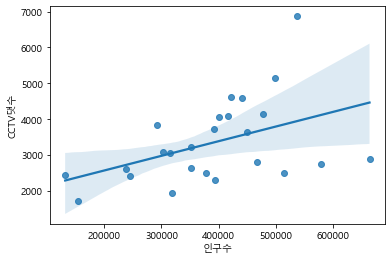

In [9]:
# cctv 댓수 vs 인구수
sns.regplot(x='인구수',y='CCTV댓수',data=df)
plt.show()

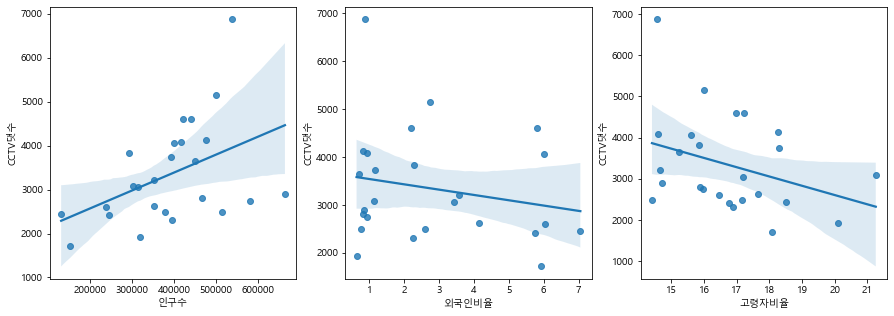

In [11]:
_, axs = plt.subplots(1, 3, figsize=(15,5))
features = ['인구수', '외국인비율', '고령자비율']
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[i])

- 구별 CCTV 댓수 시각화

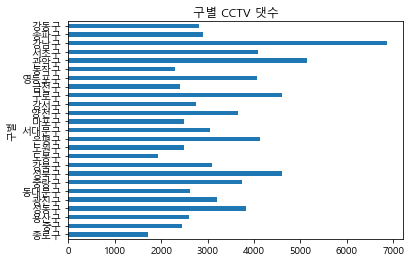

In [13]:
df.CCTV댓수.plot(kind='barh')
plt.title('구별 CCTV 댓수')
plt.show()

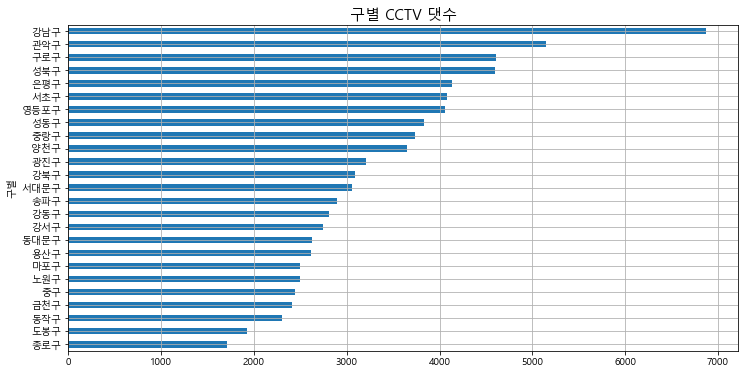

In [16]:
df.CCTV댓수.sort_values().plot(kind='barh', grid=True, figsize=(12,6))
plt.title('구별 CCTV 댓수', fontsize=15)
plt.show()

- 인구대비 CCTV 비율 시각화

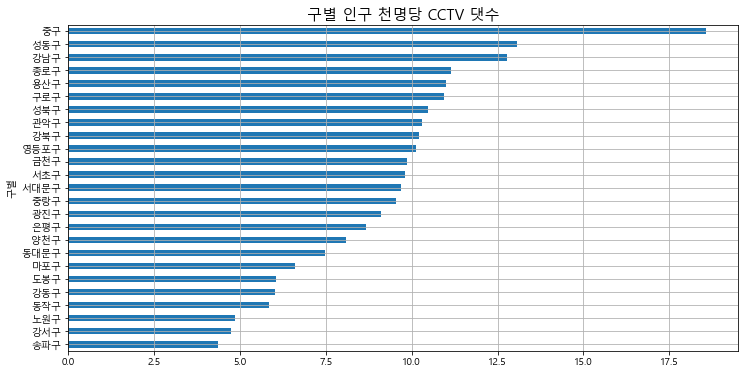

In [26]:
# 천명당 CCTV 댓수
df['CCTV비율'] = (df.CCTV댓수 / (df.인구수/1000)).round(2)
df.CCTV비율.sort_values().plot(kind='barh', grid=True, figsize=(12,6))
plt.title('구별 인구 천명당 CCTV 댓수', fontsize=15)
plt.show()


### 인구수와 CCTV 댓수 분석
- 산점도(Scatter plot)

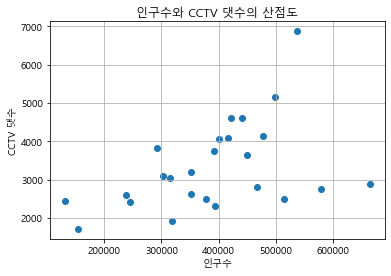

In [29]:
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.grid(); plt.show()

- 회귀선

In [34]:
weight, bias = np.polyfit(df.인구수, df.CCTV댓수, 1)                    # X,Y,차수 (1은 1차식을 의미)
weight, bias


(0.004085429243410676, 1751.2460231825626)

In [36]:
x = np.array([100000, 700000])
y = weight * x + bias
y

array([2159.78894752, 4611.04649357])

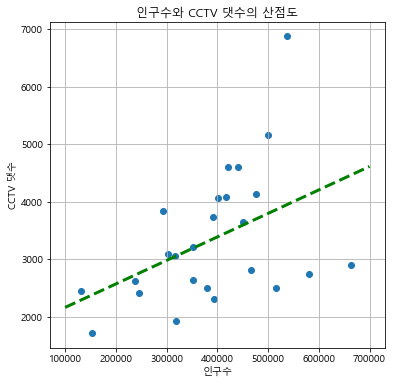

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.plot(x, y, 'g--', lw=3)                           # g-- 는 green, dashed(--) lw 는 line width
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.grid(); plt.show()

- 회귀선과 산점도 사이의 오차

In [44]:
df['오차'] = abs(df.CCTV댓수 - (df.인구수*weight + bias)).round(2)
df_sort = df.sort_values(by='오차', ascending=False)       # 오차가 큰것부터
df_sort.head()


,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,6871,63.24,537800,533042,4758,78226,0.88,14.55,12.78,2922.61
송파구,2897,204.31,663965,658338,5627,97691,0.85,14.71,4.36,1566.83
강서구,2744,79.11,579768,574315,5453,92558,0.94,15.96,4.73,1375.85
노원구,2492,68.47,514946,510956,3990,88345,0.77,17.16,4.84,1363.02
관악구,5149,48.29,499449,485699,13750,79871,2.75,15.99,10.31,1357.29


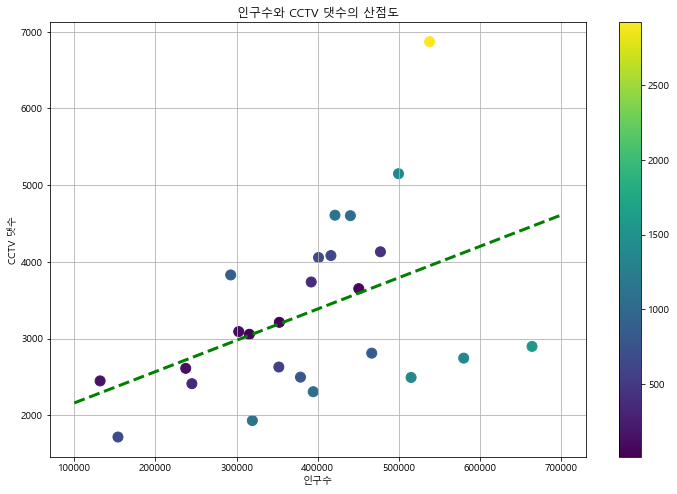

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=100)   # s = 점크기(size)
plt.plot(x, y, 'g--', lw=3)                           # g-- 는 green, dashed(--) lw 는 line width
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.colorbar()
plt.grid(); plt.show()

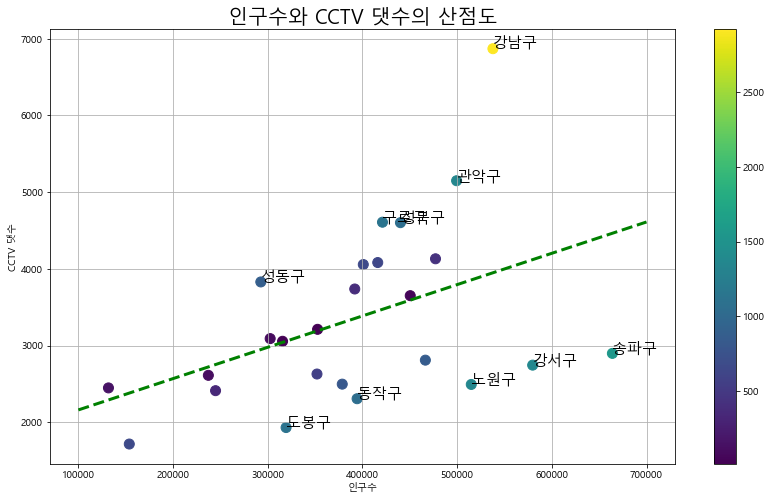

In [55]:
plt.figure(figsize=(14,8))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=100)   # s = 점크기(size)
plt.plot(x, y, 'g--', lw=3)                           # g-- 는 green, dashed(--) lw 는 line width
for i in range(10):
    plt.text(df_sort.인구수[i], df_sort.CCTV댓수[i],
             df_sort.index[i], fontsize=15)
plt.title('인구수와 CCTV 댓수의 산점도', fontsize=20)
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.colorbar()
plt.grid(); plt.show()

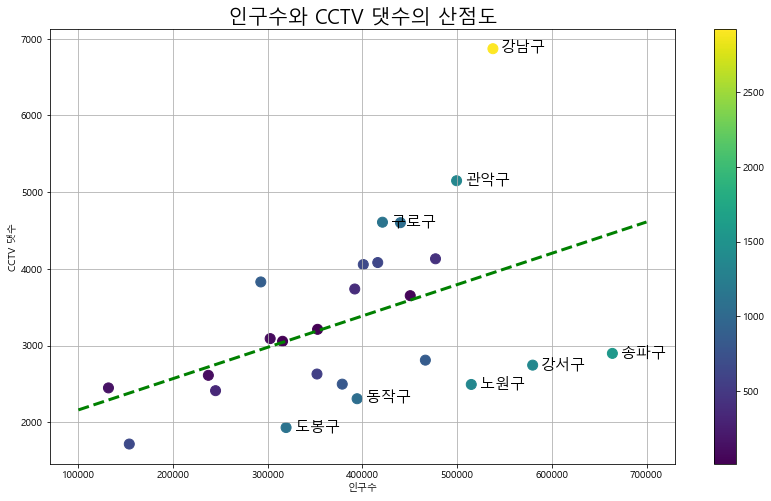

In [57]:
plt.figure(figsize=(14,8))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=100)   # s = 점크기(size)
plt.plot(x, y, 'g--', lw=3)                           # g-- 는 green, dashed(--) lw 는 line width
for i in range(8):
    plt.text(df_sort.인구수[i]+9000, df_sort.CCTV댓수[i]-50,
             df_sort.index[i], fontsize=15)
plt.title('인구수와 CCTV 댓수의 산점도', fontsize=20)
plt.xlabel('인구수'), plt.ylabel('CCTV 댓수')
plt.colorbar()
plt.grid(); plt.show()